<a href="https://colab.research.google.com/github/student-monika/Marvel_tasks_Level_2/blob/main/Table_Analysis_Using_PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install paddleocr
!pip install paddlepaddle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=a2652d633685174fa71fa4928751a33e60e7078ee538bfc3aae69d7a89b6ba0a
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.8/192.8 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: opt_einsum
    Found ex

Loading image...
Extracting text using OCR...
[2025/03/30 02:31:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_s

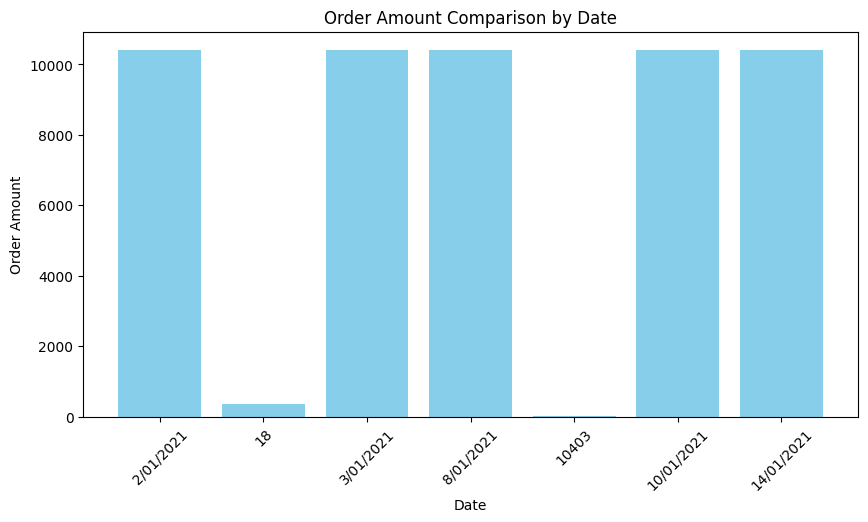

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR

def load_image(image_path):
    """Loads an image from the specified path."""
    return cv2.imread(image_path)

def extract_text_from_image(image_path):
    """Performs OCR to extract text from an image."""
    ocr = PaddleOCR(use_angle_cls=True, lang="en")
    result = ocr.ocr(image_path, cls=True)
    return result

def process_ocr_result(result):
    """Processes OCR results and structures them into a DataFrame."""
    data = []
    for line in result:
        for word_info in line:
            text = word_info[1][0]
            data.append(text)

    columns = ["Date", "Order Amount", "Units"]
    data_rows = [data[i:i+3] for i in range(0, len(data), 3)]

    df = pd.DataFrame(data_rows, columns=columns)

    # Convert numerical columns
    df["Order Amount"] = pd.to_numeric(df["Order Amount"], errors='coerce')
    df["Units"] = pd.to_numeric(df["Units"], errors='coerce')

    return df.dropna()

def analyze_data(df):
    """Performs basic statistical analysis."""
    print("\nExtracted Table Data:")
    print(df)

    print("\nBasic Statistics:")
    print(df.describe())

def visualize_data(df):
    """Generates a bar chart for order amount comparison."""
    plt.figure(figsize=(10, 5))
    plt.bar(df["Date"], df["Order Amount"], color='skyblue')
    plt.xlabel("Date")
    plt.ylabel("Order Amount")
    plt.title("Order Amount Comparison by Date")
    plt.xticks(rotation=45)
    plt.show()

def main(image_path):
    """Runs the full pipeline: Load, OCR, Process, Analyze, and Visualize."""
    print("Loading image...")
    img = load_image(image_path)

    print("Extracting text using OCR...")
    ocr_result = extract_text_from_image(image_path)

    print("Processing OCR results...")
    df = process_ocr_result(ocr_result)

    print("Analyzing data...")
    analyze_data(df)

    print("Visualizing results...")
    visualize_data(df)

image_path = "/content/tableocr.png"
main(image_path)
